## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset

data_df = pd.merge(mouse_metadata, study_results, how = 'outer', on='Mouse ID')
data_df.head()
# Display the data table for preview


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.

data_df['Mouse ID'].value_counts()

g989    13
k403    10
j365    10
j984    10
k210    10
        ..
v199     1
t573     1
f932     1
b447     1
u153     1
Name: Mouse ID, Length: 249, dtype: int64

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

duplicate_data_df = data_df.set_index('Mouse ID')
print(duplicate_data_df.head())


         Drug Regimen   Sex  Age_months  Weight (g)  Timepoint  \
Mouse ID                                                         
k403         Ramicane  Male          21          16          0   
k403         Ramicane  Male          21          16          5   
k403         Ramicane  Male          21          16         10   
k403         Ramicane  Male          21          16         15   
k403         Ramicane  Male          21          16         20   

          Tumor Volume (mm3)  Metastatic Sites  
Mouse ID                                        
k403               45.000000                 0  
k403               38.825898                 0  
k403               35.014271                 1  
k403               34.223992                 1  
k403               32.997729                 1  


In [20]:
# Optional: Get all the data for the duplicate mouse ID. 

duplicate_data_df.loc['k403']

,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,,,
k403,Ramicane,Male,21,16,0,45.000000,0
k403,Ramicane,Male,21,16,5,38.825898,0
k403,Ramicane,Male,21,16,10,35.014271,1
k403,Ramicane,Male,21,16,15,34.223992,1
k403,Ramicane,Male,21,16,20,32.997729,1
k403,Ramicane,Male,21,16,25,33.464577,1
k403,Ramicane,Male,21,16,30,31.099498,1
k403,Ramicane,Male,21,16,35,26.546993,1
k403,Ramicane,Male,21,16,40,24.365505,1


In [22]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = duplicate_data_df.drop(['k403'])
print (clean_df)

         Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
Mouse ID                                                           
s185        Capomulin  Female           3          17          0   
s185        Capomulin  Female           3          17          5   
s185        Capomulin  Female           3          17         10   
s185        Capomulin  Female           3          17         15   
s185        Capomulin  Female           3          17         20   
...               ...     ...         ...         ...        ...   
z969         Naftisol    Male           9          30         25   
z969         Naftisol    Male           9          30         30   
z969         Naftisol    Male           9          30         35   
z969         Naftisol    Male           9          30         40   
z969         Naftisol    Male           9          30         45   

          Tumor Volume (mm3)  Metastatic Sites  
Mouse ID                                        
s185             

In [23]:
# Checking the number of mice in the clean DataFrame.

clean_number_df = clean_df.reset_index()

clean_number_df['Mouse ID'].value_counts()

g989    13
s185    10
k894    10
j984    10
k210    10
        ..
n482     1
x336     1
l872     1
d133     1
h428     1
Name: Mouse ID, Length: 248, dtype: int64

## Summary Statistics

In [24]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

summary_df = clean_number_df.groupby(['Drug Regimen'])

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 

# mean, median, variance, standard deviation, and SEM of the tumor volume. 

tumour_volume_mean = summary_df['Tumor Volume (mm3)'].mean()

tumour_volume_median = summary_df['Tumor Volume (mm3)'].median()

tumour_volume_variance = summary_df['Tumor Volume (mm3)'].var()

tumour_volume_std = summary_df['Tumor Volume (mm3)'].std()

tumour_volume_sem = summary_df['Tumor Volume (mm3)'].sem()

# Assemble the resulting series into a single summary dataframe.

tumour_volume_df = pd.DataFrame({'Mean' : tumour_volume_mean, 'Median' : tumour_volume_mean, 'Variance' : tumour_volume_variance, 

'Standard Deviation' : tumour_volume_std, 'SEM' : tumour_volume_sem })


tumour_volume_df.head()

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,40.675741,24.947764,4.994774,0.329346
Ceftamin,52.591172,52.591172,39.290177,6.268188,0.469821
Infubinol,52.884795,52.884795,43.128684,6.567243,0.492236
Ketapril,55.235638,55.235638,68.553577,8.279709,0.603860
Naftisol,54.331565,54.331565,66.173479,8.134708,0.596466


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

tumor = clean_number_df.groupby (['Drug Regimen'])['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])
tumor


# Using the aggregation method, produce the same summary statistics in a single line


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

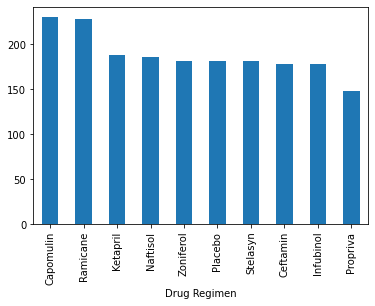

In [9]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

study = clean_number_df.groupby(['Drug Regimen'])['Timepoint'].count()
study.sort_values(ascending=False).plot.bar()
plt.show()

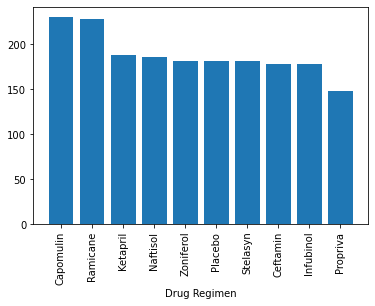

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

study2 = study.sort_values(ascending=False) 
plt.bar(study2.index, study2.values)
plt.xlabel ('Drug Regimen')
plt.xticks(rotation='vertical')
plt.show()

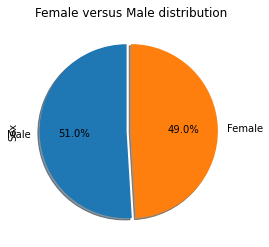

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

mice_gender = clean_number_df['Sex'].value_counts()
pie_plot= mice_gender.plot.pie(startangle=90, explode=(0.05,0), shadow=True, autopct='%1.1f%%', title='Female versus Male distribution')

<function matplotlib.pyplot.show(close=None, block=None)>

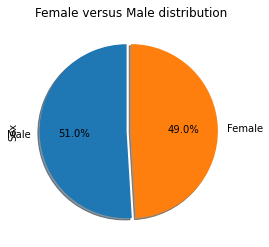

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

gender_py = mice_gender.plot(kind='pie', y='sex', autopct='%1.1f%%', title='Female versus Male distribution', explode=(0.05,0), shadow=True, startangle=90)
gender_py.set_ylabel('Sex')
plt.show

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse

greatest_tp = clean_number_df.groupby(['Mouse ID'])['Timepoint'].max().sort_values()
greatest_tp_df = pd.DataFrame(greatest_tp)


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

last_tp_df = pd.merge(clean_number_df, greatest_tp_df, on='Mouse ID')
last_tp_df


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint_x,Tumor Volume (mm3),Metastatic Sites,Timepoint_y
0,k403,Ramicane,Male,21,16,0,45.000000,0,45
1,k403,Ramicane,Male,21,16,5,38.825898,0,45
2,k403,Ramicane,Male,21,16,10,35.014271,1,45
3,k403,Ramicane,Male,21,16,15,34.223992,1,45
4,k403,Ramicane,Male,21,16,20,32.997729,1,45
...,...,...,...,...,...,...,...,...,...
1875,z969,Naftisol,Male,9,30,25,63.145652,2,45
1876,z969,Naftisol,Male,9,30,30,65.841013,3,45
1877,z969,Naftisol,Male,9,30,35,69.176246,4,45
1878,z969,Naftisol,Male,9,30,40,70.314904,4,45


In [14]:
# Put treatments into a list for for loop (and later for plot labels)

Capomulin = clean_number_df.loc[clean_number_df['Drug Regimen'] == 'Capomulin']
Ramicane = clean_number_df.loc[clean_number_df['Drug Regimen'] == 'Ramicane']
Infubinol = clean_number_df.loc[clean_number_df['Drug Regimen'] == 'Infubinol']
Ceftamin = clean_number_df.loc[clean_number_df['Drug Regimen'] == 'Ceftamin']


# Create empty list to fill with tumor vol data (for plotting)

x_axis_cap = Capomulin['Tumor Volume (mm3)']
x_axis_ram = Ramicane['Tumor Volume (mm3)']
x_axis_inf = Infubinol['Tumor Volume (mm3)']
x_axis_cef = Ceftamin['Tumor Volume (mm3)']


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

# IQR  Ramicane

quartile_ram = x_axis_ram.quantile([.25,.5,.75])
lowerq_ram=quartile_ram[0.25]
upperq_ram=quartile_ram[0.75]
iqr_ram=upperq_ram-lowerq_ram
lower_bound_ram=lowerq_ram - (1.5*iqr_ram)
upper_bound_ram=upperq_ram + (1.5*iqr_ram)
print("Drug: Ramicane")
print(quartile_ram)
print(lowerq_ram)
print(upperq_ram)
print(iqr_ram)
print(f'Values below {lower_bound_ram} could be outliers.')
print(f'Values below{upper_bound_ram} could be outliers.')
print ('--------------------------------------------------')

# IQR  Capomulin
quartile_cap = x_axis_cap.quantile([.25,.5,.75])
lowerq_cap=quartile_cap[0.25]
upperq_cap=quartile_cap[0.75]
iqr_cap=upperq_cap-lowerq_cap
lower_bound_cap=lowerq_cap - (1.5*iqr_cap)
upper_bound_cap=upperq_cap + (1.5*iqr_cap)
print("Drug: Capomulin")
print(quartile_cap)
print(lowerq_cap)
print(upperq_cap)
print(iqr_cap)
print(f'Values below {lower_bound_cap} could be outliers.')
print(f'Values below{upper_bound_cap} could be outliers.')
print ('--------------------------------------------------')

# IQR  Infubinol
quartile_inf= x_axis_inf.quantile([.25,.5,.75])
lowerq_inf=quartile_inf[0.25]
upperq_inf=quartile_inf[0.75]
iqr_inf=upperq_inf-lowerq_inf
lower_bound_inf=lowerq_inf - (1.5*iqr_inf)
upper_bound_inf=upperq_inf + (1.5*iqr_inf)
print("Drug: Infubinol")
print(quartile_inf)
print(lowerq_inf)
print(upperq_inf)
print(iqr_inf)
print(f'Values below {lower_bound_inf} could be outliers.')
print(f'Values below{upper_bound_inf} could be outliers.')
print ('--------------------------------------------------')

# IQR  Ceftamin
quartile_cef= x_axis_cef.quantile([.25,.5,.75])
lowerq_cef=quartile_cef[0.25]
upperq_cef=quartile_cef[0.75]
iqr_cef=upperq_cef-lowerq_cef
lower_bound_cef=lowerq_cef - (1.5*iqr_cef)
upper_bound_cef=upperq_cef + (1.5*iqr_cef)
print("Drug: Ceftamin")
print(quartile_cef)
print(lowerq_cef)
print(upperq_cef)
print(iqr_cef)
print(f'Values below {lower_bound_cef} could be outliers.')
print(f'Values below{upper_bound_cef} could be outliers.')
print ('--------------------------------------------------')

Drug: Ramicane
0.25    36.674635
0.50    40.673236
0.75    45.000000
Name: Tumor Volume (mm3), dtype: float64
36.674634585
45.0
8.325365415
Values below 24.1865864625 could be outliers.
Values below57.488048122500004 could be outliers.
--------------------------------------------------
Drug: Capomulin
0.25    37.685933
0.50    41.557809
0.75    45.000000
Name: Tumor Volume (mm3), dtype: float64
37.685932865
45.0
7.314067135000002
Values below 26.714832162499995 could be outliers.
Values below55.9711007025 could be outliers.
--------------------------------------------------
Drug: Infubinol
0.25    47.312353
0.50    51.820584
0.75    57.314444
Name: Tumor Volume (mm3), dtype: float64
47.3123533
57.314443967500004
10.002090667500006
Values below 32.309217298749985 could be outliers.
Values below72.31757996875001 could be outliers.
--------------------------------------------------
Drug: Ceftamin
0.25    47.208427
0.50    51.776157
0.75    56.801438
Name: Tumor Volume (mm3), dtype: float6

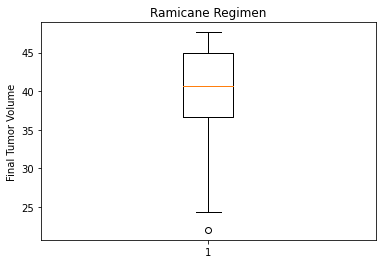

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

# ramicane
fig1, ax1 = plt.subplots()
ax1.set_title('Ramicane Regimen')
ax1.set_ylabel('Final Tumor Volume')
ax1.boxplot(x_axis_ram)
plt.show()


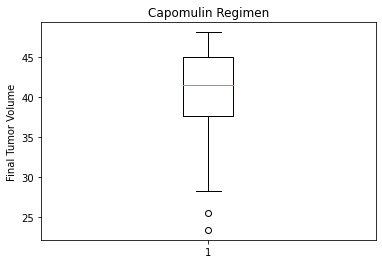

In [16]:
# capomulin

fig1, ax1 = plt.subplots()
ax1.set_title('Capomulin Regimen')
ax1.set_ylabel('Final Tumor Volume')
ax1.boxplot(x_axis_cap)
plt.show()

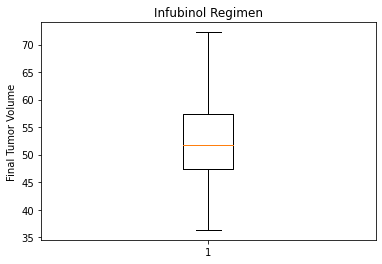

In [17]:
# infubinol

fig1, ax1 = plt.subplots()
ax1.set_title('Infubinol Regimen')
ax1.set_ylabel('Final Tumor Volume')
ax1.boxplot(x_axis_inf)
plt.show()

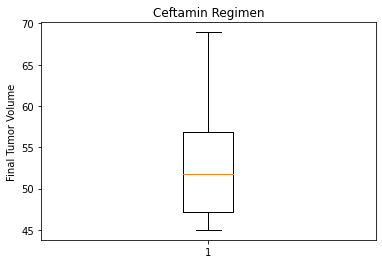

In [18]:
# ceftamin
fig1, ax1 = plt.subplots()
ax1.set_title('Ceftamin Regimen')
ax1.set_ylabel('Final Tumor Volume')
ax1.boxplot(x_axis_cef)
plt.show()

## Line and Scatter Plots

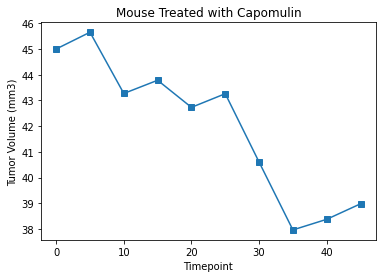

In [19]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

Cap_mouse = Capomulin.loc[Capomulin["Mouse ID"] == "b128"]
Cap_mouse

plt.plot(Cap_mouse["Timepoint"], Cap_mouse["Tumor Volume (mm3)"], marker = 's')
plt.title('Mouse Treated with Capomulin')
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

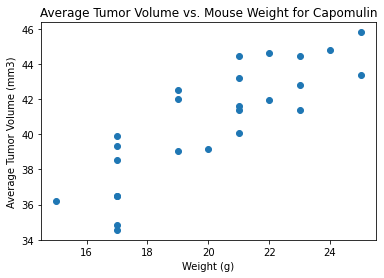

In [32]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

cap_average = Capomulin.groupby(['Mouse ID']).mean()
plt.scatter(cap_average["Weight (g)"], cap_average['Tumor Volume (mm3)'])
plt.title("Average Tumor Volume vs. Mouse Weight for Capomulin")
plt.xlabel("Weight (g)")
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()


## Correlation and Regression

The correlation coefficient for mouse weight and average tumor volume for the Capomulin regimen is 0.84


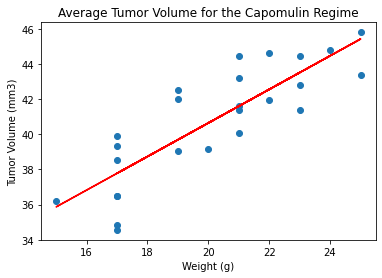

In [34]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

# correlation coefficient

cor = round(st.pearsonr(cap_average['Weight (g)'], cap_average['Tumor Volume (mm3)'])[0],2)
print(f'The correlation coefficient for mouse weight and average tumor volume for the Capomulin regimen is {cor}')

# linear regression

x_value = cap_average["Weight (g)"]
y_value = cap_average['Tumor Volume (mm3)']
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_value, y_value)
regress_value=x_value*slope + intercept
line_eq = 'y = ' + str(round(slope,2)) + 'x +' + str(round(intercept,2))
plt.scatter(x_value, y_value)
plt.title('Average Tumor Volume for the Capomulin Regime')
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.plot(x_value,regress_value, 'r-')
plt.show()